# A note about sigmas

We are regularly asked about the default "sigma" confidence levels in the 2D histograms. The default confidence levels are `(0.118, 0.393, 0.675, 0.864)` corresponding to the `(0.5, 1, 1.5, 2)`-sigma confidence regions for a **2D** Gaussian distribution. These differ from the corresponding `(0.382, 0.683, 0.866, 0.955)` confidence intervals you would expect for a **1D** Guassian distribution. On this page, we will give a brief explanation about Gaussian distributions, confidence levels, and how the default `corner` confidence levels work.

In one dimension, a Gaussian probability density is given by

    pdf(r) = exp(-(r/s)^2/2) / sqrt(2*pi*s^2)

If we integrate this distribution from `r = (-1*s, -2*s, -3*s)` to `(+1*s, +2*s, +3*s)` then we see that these ranges respectively include `(68.3%, 95.4%, 99.7%)` of the probability. Because scientists often report 1D confidence intervals and many distributions are approximately normal, it has become conventional to call reported confidence intervals  "`n-σ` confidence intervals" if the confidence level matches the probability contained in a 1D Gaussian distribution between `r=+/-n*s`. However, the relationship between, e.g., the 68.3% confidence level and `1-σ` doesn't make sense for non-Guassian distributions because those distributions may not be parametrized by a `σ` parameter at all. As we will see below, this relationship changes even for a 2D Gaussian density.

In two dimensions, a Gaussian probability density is given by:

    pdf(r) = exp(-(r/s)^2/2) / (2*pi*s^2)

If we integrate (marginalize) over the polar angle and integrate the probability within a radius `r` from the center of the distribution we compute

    cdf(r) = Integral(r' * exp(-(r'/s)^2/2) / s^2, {r', 0, r})
           = 1 - exp(-(r/s)^2/2)

From this calculation we see that for `r = (0.5*s, 1*s, 1.5*s, 2*s)` the included probability is `(11.8%, 39.3%, 67.5%, 86.4%)` matching the `corner.py` default confidence levels for the 2D histograms.

The advantage of using the 2D Gaussian sigma confidence levels for the  2D histograms is that, for data that are approximately multivariate normally distributed and uncorrelated, the edges of the n-sigma confidence regions shown in the 2D histogram will line up with the n-sigma confidence intervals shown in the 1D histogram at the top of the figure column. See below.

In [ ]:
import corner
import numpy as np

one_sigma_1d = 0.683
q_lower = 1/2  - one_sigma_1d/2
q_upper = 1/2  + one_sigma_1d/2

one_sigma_2d = 0.393

# Generate some fake data from a Gaussian
np.random.seed(42)
x = np.random.randn(50000, 2)

First, plot this using the 2D Gaussian 1-sigma confidence level  (39.3%) for the 2D histogram with the 1D Gaussian 1-sigma confidence interval for the 1D histogram:

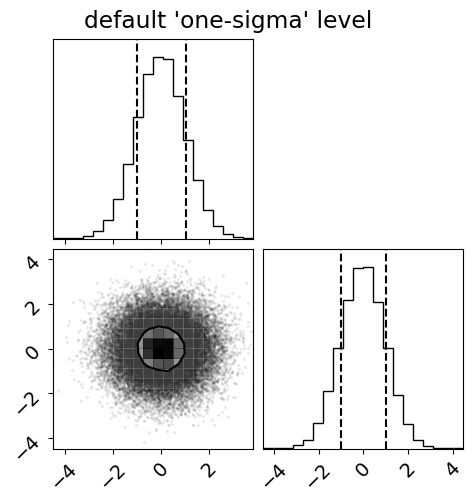

In [ ]:
fig = corner.corner(x, quantiles=(q_lower, q_upper), levels=(one_sigma_2d,))
_ = fig.suptitle("default 'one-sigma' level")

Now, plot this using 1D Gaussian 1-sigma confidence level (68.3%) for the 2D histogram again with the 1D Gaussian 1-sigma confidence interval for the 1D histogram:

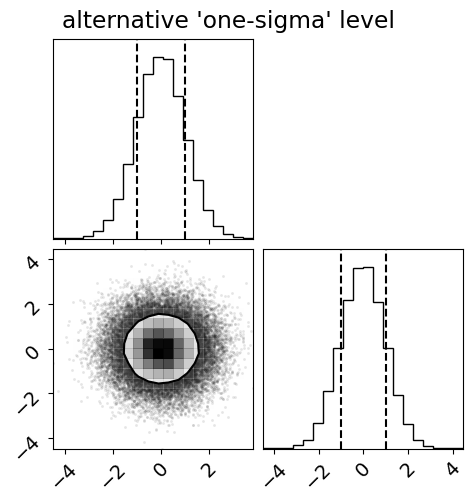

In [ ]:
fig = corner.corner(x, quantiles=(0.16, 0.84), levels=(0.68,))
_ = fig.suptitle("alternative 'one-sigma' level")

We see that the edges of the 2D confidence region no longer line up with the edges of the 1D confidence region. However, this visualization has the advantage that the same percentage of data is contained within the confidence regions in each plot, a condition which is not satisfied when using the default 2D Gaussian sigma levels.